# 10. Classical models

## 10.1 Autoregression (AR)
Auto-regression (AR) is a fundamental concept in time series analysis, where a time series is a sequence of data points measured or recorded at successive points in time. Auto-regression involves modeling a time series as a linear combination of its past values. The idea is to predict the future values of the series based on its own past values. The notation for an autoregressive model is AR(p), where "p" represents the number of lagged (past) values used for prediction.

Here's how you can apply auto-regression in time series analysis:

1. **Data Preparation:** Start by collecting your time series data. Ensure it's stationary, which means that its statistical properties do not change over time. If your data is non-stationary, consider differencing it to make it stationary.

2. **Choose the Order (p):** Determine the order of the autoregressive model, denoted as "p." This represents the number of past time steps you'll use to predict the current value. You can choose this order based on domain knowledge or by examining autocorrelation and partial autocorrelation plots of your data.

3. **Model Estimation:** Use statistical software or programming languages like Python (using libraries like statsmodels or ARIMA) to estimate the AR(p) model's parameters. The goal is to find coefficients for the past values (lags) that minimize the prediction error.

4. **Model Evaluation:** Evaluate the model's goodness of fit using metrics like Mean Squared Error (MSE), Akaike Information Criterion (AIC), Bayesian Information Criterion (BIC), or others. You may also use visual methods like plotting the predicted vs. actual values.

Here's a simple example in Python using the statsmodels library to perform AR(2) modeling on a synthetic time series:









In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Extract the passenger counts as the data
data = df['Passengers']

# Fit an AR(2) model
order = 2
model = sm.tsa.AutoReg(data, lags=order, trend='n').fit()

# Make predictions
predictions = model.predict(start=order, end=len(data)-1)

# Set font size
plt.rcParams.update({'font.size': 9})

# Plot the original and predicted time series
plt.figure(figsize=(8, 4))
plt.plot(data.index, data, label='Original Data')
plt.plot(data.index[order:], predictions, label=f'AR({order}) Predictions', linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.title(f'AR({order}) Model')
plt.grid(True)

plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In this example, we generated a synthetic time series and then fitted an AR(2) model to it. The model was used to make predictions, which were then plotted alongside the original data for visualization. You can adjust the order and model parameters as needed for your specific dataset and requirements.

The method is suitable for ***univariate time series without trend and seasonal*** components.

## 10.2 Moving Average (MA)
Moving Average is a commonly used technique in time series analysis for **smoothing out noisy or random fluctuations in the data**.

It is a statistical method used to analyze data points by creating a series of averages of different subsets of the full dataset.

In Moving Average, a sliding window of a fixed size (the "window size") is applied to the time series data, and the mean of the data points within the window is calculated. This mean value is then used to replace the value of the central data point in the window. The window is then shifted by one time step, and the process is repeated for the next subset of data points. This produces a new smoothed series of data points, with the size of the window determining the level of smoothing applied.

The moving average method is useful in time series analysis for identifying trends and seasonality in the data by removing noise and random fluctuations. It can also be used to forecast future values by taking the moving average of the past values and extrapolating this trend forward. The Moving Average is widely used in the financial industry for technical analysis of stock prices and financial market indices. It is also used in forecasting demand for products, such as in the retail industry, and in predicting traffic patterns, weather patterns, and other types of time series data.

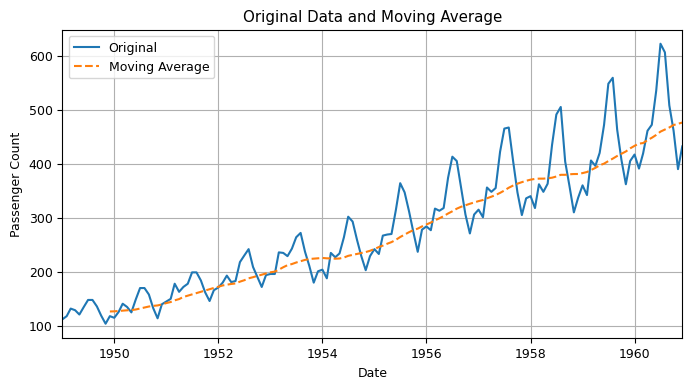

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', header=0, index_col=0, parse_dates=True)

# Create a rolling window of size 12 and calculate the moving average
window_size = 12
rolling = df.rolling(window=window_size)
rolling_mean = rolling.mean()

# Set font size
plt.rcParams.update({'font.size': 9})

# Plot the original data and the moving average
plt.figure(figsize=(8, 4))
plt.plot(df, label='Original')
plt.plot(rolling_mean, label='Moving Average',linestyle='--')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.title('Original Data and Moving Average')
plt.grid(True)

# Set x-axis limits to start from the beginning
plt.xlim(df.index[0], df.index[-1])

plt.show()



* Moving Average (MA) is a commonly used method in time  series analysis for smoothing out the fluctuations in a time series and identifying underlying trends.

* MA can be used when you have a time series dataset that exhibits fluctuations or seasonality, but you want to identify the underlying trend in the data.

* MA is often used in combination with other time series analysis techniques, such as autoregression, to build more complex models.

* In addition, MA can be used for forecasting future values in a time series, by using the calculated moving average to predict the future values of the series.

Overall, Moving Average is a versatile tool that can be applied to a wide range of time series datasets to extract meaningful insights and make predictions.

## 10.3 Autoregressive Moving Average (ARMA)
The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models.

The notation for the model involves specifying the order for the AR(p) and MA(q) models as parameters to an ARMA function, e.g. ARMA(p, q). An ARIMA model can be used to develop AR or MA models.

The method is suitable for univariate time series without trend and seasonal components.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Extract the passenger counts as the data
data = df['Passengers']

# Fit an ARMA(2,2) model
order = (2, 0, 2)
model = sm.tsa.SARIMAX(data, order=order, trend='n').fit()

# Make predictions
predictions = model.predict(start=order[2], end=len(data)-1)

In [ ]:
# Calculate metrics
mae = mean_absolute_error(data[order[2]:], predictions)
mse = mean_squared_error(data[order[2]:], predictions)
rmse = np.sqrt(mse)

Mean Absolute Error (MAE): 24.14
Mean Squared Error (MSE): 962.12
Root Mean Squared Error (RMSE): 31.02


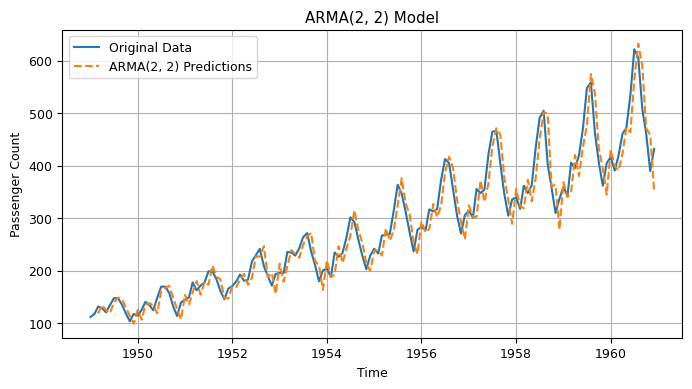

In [ ]:
# Set font size
plt.rcParams.update({'font.size': 9})

# Plot the original and predicted time series
plt.figure(figsize=(8, 4))
plt.plot(data.index, data, label='Original Data')
plt.plot(data.index[order[2]:], predictions, label=f'ARMA({order[0]}, {order[2]}) Predictions', linestyle='--')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.title(f'ARMA({order[0]}, {order[2]}) Model')
plt.grid(True)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

plt.show()

## 10.4 Autoregressive Integrated Moving Average (ARIMA)
The Autoregressive Integrated Moving Average (ARIMA) method models the next step in the sequence as a linear function of the differenced observations and residual errors at prior time steps.

It combines both Autoregression (AR) and Moving Average (MA) models as well as a differencing pre-processing step of the sequence to make the sequence stationary, called integration (I).

The notation for the model involves specifying the order for the AR(p), I(d), and MA(q) models as parameters to an ARIMA function, e.g. ARIMA(p, d, q). An ARIMA model can also be used to develop AR, MA, and ARMA models.

The method is suitable for univariate time series with trend and without seasonal components.
Autoregressive Integrated Moving Average (ARIMA) is a commonly used time series analysis technique for modeling and forecasting time series data. ARIMA models are a combination of three basic components:

1. Autoregression (AR): The AR component of an ARIMA model uses past values of the time series to predict future values. Specifically, it assumes that future values of the time series depend on its past values and that the relationship between the past and future values can be captured using a linear regression model.

2. Moving Average (MA): The MA component of an ARIMA model uses past errors or residuals of the time series to predict future values. Specifically, it assumes that future values of the time series depend on the past errors or residuals and that the relationship between the errors and future values can be captured using a linear regression model.

3. Integration (I): The I component of an ARIMA model involves differencing the time series to remove trends or seasonality. Specifically, it assumes that future values of the time series depend on the differences between its past values and that the differences can be captured using a linear regression model.

ARIMA models are characterized by three parameters: p, d, and q. The parameter p is the order of the AR component, the parameter d is the degree of differencing required to make the time series stationary, and the parameter q is the order of the MA component. These parameters can be determined using statistical techniques such as autocorrelation and partial autocorrelation analysis.

Overall, ARIMA models are widely used in various fields, such as economics, finance, and engineering, for time series forecasting, anomaly detection, and other applications.

Here's a list of some datasets that can be used to apply ARIMA models:

1. Airline Passengers Dataset - Monthly totals of international airline passengers from 1949 to 1960. https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

2. Daily Female Births Dataset - Daily female births in California in 1959. https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv

3. Monthly Sunspots Dataset - Monthly count of sunspots from 1749 to 1983. https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv

4. Shampoo Sales Dataset - Monthly sales of shampoo over a three-year period. https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

5. Daily Water Usage Dataset - Daily water usage in Baltimore from 1885 to 1963. https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-water-usage.csv

You can use these datasets to apply ARIMA models using Python libraries such as `pandas`, `statsmodels`, and `scikit-learn`. Simply load the dataset using `pandas`, preprocess it, and fit an ARIMA model using `statsmodels`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

# Extract the passenger counts as the data
data = df['Passengers']

# Fit an ARIMA(2,1,2) model
order = (2, 1, 2)
model = sm.tsa.ARIMA(data, order=order, trend='n').fit()

# Make predictions
predictions = model.predict(start=len(data), end=len(data) + 11, typ='levels')

# Calculate metrics
mae = mean_absolute_error(data[-12:], predictions)
mse = mean_squared_error(data[-12:], predictions)
rmse = np.sqrt(mse)

Mean Absolute Error (MAE): 50.60
Mean Squared Error (MSE): 3386.11
Root Mean Squared Error (RMSE): 58.19


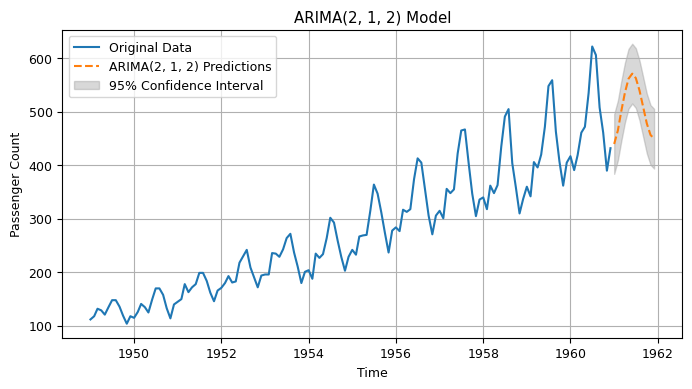

In [ ]:
# Set font size
plt.rcParams.update({'font.size': 9})

# Plot the original and predicted time series
plt.figure(figsize=(8, 4))
plt.plot(data.index, data, label='Original Data')
plt.plot(predictions.index, predictions, label=f'ARIMA({order[0]}, {order[1]}, {order[2]}) Predictions', linestyle='--')
plt.fill_between(predictions.index, predictions - .96 * rmse, predictions + .96 * rmse, alpha=0.3, color='gray', label='95% Confidence Interval')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Passenger Count')
plt.title(f'ARIMA({order[0]}, {order[1]}, {order[2]}) Model')
plt.grid(True)

# Print metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

plt.show()

## 10.5 Seasonal Autoregressive Integrated Moving-Average (SARIMA)
The Seasonal Autoregressive Integrated Moving Average (SARIMA) model is an extension of the ARIMA model that includes a seasonal component. It is suitable for analyzing time series data that exhibit both temporal dependence and seasonal variation, and is particularly useful when the time series data exhibits a predictable pattern of seasonal variation, such as monthly or quarterly data.

The SARIMA model combines the ARIMA model with the ability to perform the same autoregression, differencing, and moving average modeling at the seasonal level. The model is characterized by three parameters (p, d, q), which are the same as in the ARIMA model, and three additional parameters (P, D, Q), which correspond to the seasonal counterparts of p, d, and q. The seasonal component is typically specified as the number of time steps in a seasonal cycle, denoted by s.

In practice, the SARIMA model is typically applied to time series data by first identifying the appropriate order of differencing required to make the data stationary. Once the data has been differenced, the seasonal component is modeled using the SARIMA model. The model is commonly used in a variety of applications, including finance, economics, and meteorology. It is particularly useful for forecasting applications, where the goal is to predict future values of the time series. The model can also be used for anomaly detection and trend analysis.

Overall, the SARIMA model is a powerful tool for analyzing time series data with complex temporal and seasonal patterns. It allows for accurate modeling and forecasting of time series data, making it an essential tool for time series analysis in many different fields.

here's an example Python code for applying SARIMA on the airline passenger dataset for predicting future values:

In [ ]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt

def apply_sarima(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
    # Assuming your dataframe has a single column named 'data'
    # Replace 'data' with your actual column name
    endog = df[list(df[:])[0]]

    # Create the SARIMA model
    model = sm.tsa.SARIMAX(endog, order=order, seasonal_order=seasonal_order)

    # Fit the model
    results = model.fit()

    # Return the SARIMA model output
    return results


# Assuming you have a dataframe named 'df' with 'data' column
# You can replace 'df' and 'data' with your actual dataframe and column names

# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', parse_dates=['Month'], index_col=['Month'])

# Apply SARIMA model using the function
sarima_results = apply_sarima(df, order=(2, 1, 1), seasonal_order=(1, 1, 1, 12))  # Example orders

# Print the model summary
print(sarima_results.summary())

# Predicting future values
future_periods = 24
forecast = sarima_results.get_forecast(steps=future_periods)

# Extract the predicted values and their confidence intervals
predicted_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Generate the future dates for the predicted values
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_periods+1, freq='MS')[1:]

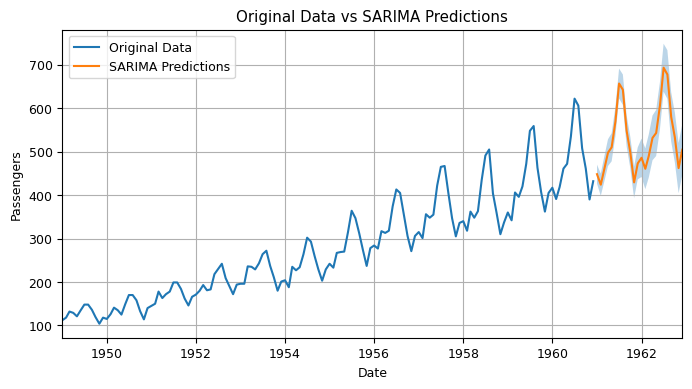

In [ ]:
# Set font size
plt.rcParams.update({'font.size': 9})

# Plotting the original data, predicted values, and confidence intervals
plt.figure(figsize=(8, 4))
plt.plot(df.index, df[list(df[:])[0]], label='Original Data')
plt.plot(future_dates, predicted_values, label='SARIMA Predictions')
plt.fill_between(future_dates, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Original Data vs SARIMA Predictions')
plt.grid(True)

# Set x-axis limits to start from the beginning
plt.xlim(df.index[0], future_dates[-1])

plt.legend()
plt.show()

## 10.6 Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX)
The Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors (SARIMAX) is an extension of the SARIMA model that allows for the inclusion of additional explanatory variables, known as exogenous regressors or covariates. These variables can help to explain and predict the behavior of the time series being analyzed.

In SARIMAX, the model is a combination of SARIMA and a regression model. The SARIMA component captures the temporal structure of the time series while the regression component captures the relationship between the time series and the exogenous variables.

The notation for the SARIMAX model is SARIMAX(p, d, q)(P, D, Q)m, where the p, d, and q parameters refer to the autoregressive, differencing, and moving average components, respectively, of the non-seasonal part of the model. The P, D, and Q parameters refer to the seasonal autoregressive, differencing, and moving average components, respectively. The m parameter represents the number of time steps in each season.

The exogenous variables are included in the model as additional predictors. These variables can be lagged versions of the time series being analyzed, or they can be entirely separate variables that are thought to influence the behavior of the time series.

SARIMAX is useful when there are external factors that may affect the behavior of the time series being analyzed, such as economic indicators or weather patterns. By incorporating these variables into the model, SARIMAX can produce more accurate forecasts than a traditional SARIMA model.

SARIMAX can be used in a variety of fields, including finance, economics, and marketing, among others. It is particularly useful in situations where there are multiple variables that may affect the behavior of the time series being analyzed.

Overall, SARIMAX is a powerful tool for analyzing time series data that incorporates both temporal structure and external factors. It allows for accurate modeling and forecasting of time series data, making it an essential tool for time series analysis in many different fields.

The method is suitable for univariate time series with trend and/or seasonal components and exogenous variables.

here's an example of applying SARIMAX on the airline passenger dataset:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col=['Month'])

# Extract the time series data
series = df['Passengers']

# Perform Dickey-Fuller test for stationarity
result = adfuller(series)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# If the series is not stationary, you can apply differencing:
# series = series.diff().dropna()



# Define the SARIMAX model
p = 1  # Autoregressive order (from PACF)
d = 1  # Differencing order (usually 1 for first-order differencing)
q = 1  # Moving average order (from ACF)
P = 1  # Seasonal autoregressive order (from seasonal PACF)
D = 1  # Seasonal differencing order (usually 1 for seasonal differencing)
Q = 1  # Seasonal moving average order (from seasonal ACF)
s = 12  # Seasonal period (e.g., 12 for monthly data)

# Create the SARIMAX model
model = sm.tsa.SARIMAX(series, order=(p, d, q), seasonal_order=(P, D, Q, s))

# Fit the model
results = model.fit()

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Tue, 17 Oct 2023   AIC                           1022.299
Time:                                    02:37:09   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.357      0.721      -0.825       0.570
ma.L1         -0.2149      0.325   

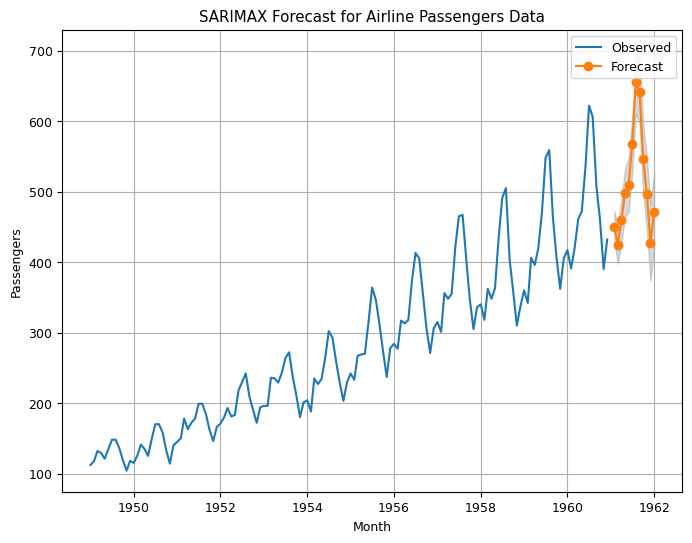

In [ ]:
# Print model summary
print(results.summary())


# Plot the forecasted values
forecast_steps = 12  # Number of steps to forecast
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(8, 6))
plt.plot(series, label='Observed')
plt.plot(pd.date_range(start=series.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast_mean, label='Forecast', marker='o')
plt.fill_between(pd.date_range(start=series.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='gray', alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.title('SARIMAX Forecast for Airline Passengers Data')
plt.grid(True)  # Add grid
plt.show()

## 10.7 Vector Autoregression (VAR)
Vector Autoregression (VAR) is a statistical model used for time series analysis. Unlike the univariate models such as ARIMA and SARIMA, VAR is a multivariate model that allows us to analyze the relationships among multiple time series variables simultaneously. The basic idea behind VAR is to model each variable as a linear function of its own lagged values and the lagged values of the other variables in the system.

In other words, a VAR model is a system of equations where each variable in the system is modeled as a function of its own past values and the past values of all the other variables in the system. This allows us to capture the dynamic interdependencies among the variables and to forecast the future values of each variable based on the past values of all the variables in the system.

VAR models are used in a variety of fields such as economics, finance, engineering, and social sciences. They can be particularly useful in analyzing the behavior of macroeconomic variables such as GDP, inflation, and interest rates, and in forecasting future values of these variables.

To predict the future values of the variables in a VAR model, we can use the same principle as in the univariate models such as ARIMA and SARIMA. We first estimate the parameters of the model using historical data, and then use the estimated model to forecast the future values of the variables. The forecasted values are obtained by applying the estimated model to the lagged values of the variables in the system.

VAR models are particularly useful when we have multiple time series variables that are interdependent and influence each other. They allow us to capture the dynamic relationships among the variables and to forecast their future values based on the past values of all the variables in the system. However, VAR models can be more complex than the univariate models and require more data to estimate the parameters accurately. They also assume that the variables in the system are stationary and normally distributed.

The notation for the model involves specifying the order for the AR(p) model as parameters to a VAR function, e.g. VAR(p).

The method is suitable for multivariate time series without trend and seasonal components.

Here are some datasets (multivariate)that can be used to apply VAR:

1. Macroeconomic data of G7 countries: This dataset contains macroeconomic data of the G7 countries from 1950 to 2014. You can download it from here: https://fred.stlouisfed.org/categories/32262

2. Stock price data: This dataset contains stock price data of various companies. You can download it from here: https://finance.yahoo.com/

3. Climate data: This dataset contains climate data from various locations around the world. You can download it from here: https://www.ncdc.noaa.gov/

4. International trade data: This dataset contains international trade data of various countries. You can download it from here: https://data.worldbank.org/

5. Crime data: This dataset contains crime data from various cities. You can download it from here: https://www.kaggle.com/uciml/crime-in-los-angeles

Please note that these datasets are just examples and there are many other datasets available that can be used to apply VAR.

Here's an example of how to use Vector Autoregression (VAR) to predict stock prices using Python and the yfinance library.

First, let's import the necessary libraries and load the data:

## 10.8 Vector Autoregression Moving-Average (VARMA)
Vector Autoregression Moving-Average (VARMA) is a statistical time series model that extends the Vector Autoregression (VAR) model to include moving average (MA) terms. The model is used to describe the behavior of multiple time series, where each variable is modeled as a linear function of past values of itself and past values of other variables in the system.

The VARMA model is represented as VARMA(p, q), where p is the number of lagged values of the endogenous variables in the model, and q is the number of lagged error terms included in the model. The model is used when the time series data exhibit both serial correlation and cross-correlation between the variables.

VARMA models are used when the time series data is stationary, meaning that the statistical properties of the data do not change over time. These models are suitable for analyzing and forecasting economic time series, such as stock prices, exchange rates, and interest rates, as well as other types of time series data, such as weather patterns and medical data.

The VARMA model is appropriate for time series data that exhibit interdependence among multiple variables and have a stationary behavior. These models are useful when we want to capture the effect of one variable on another, in addition to the effect of its own past values. VARMA models can also be useful for modeling data with short-term or long-term memory, as well as data with seasonal patterns.

The method is suitable for multivariate time series without trend and seasonal components.

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the macrodata dataset
from statsmodels.datasets import macrodata
data = macrodata.load_pandas().data

data.head(5)


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [ ]:
# Preprocess the dataset and select some columns
df = data[['realgdp', 'realinv', 'realgovt','cpi',	'm1',	'tbilrate',	'unemp',	'pop',	'infl',	'realint']]
df.index = pd.date_range(start='1959-01-01', periods=len(df), freq='Q')

df.head(5)

,realgdp,realinv,realgovt
1959-03-31,2710.349,286.898,470.045
1959-06-30,2778.801,310.859,481.301
1959-09-30,2775.488,289.226,491.260
1959-12-31,2785.204,299.356,484.052
1960-03-31,2847.699,331.722,462.199


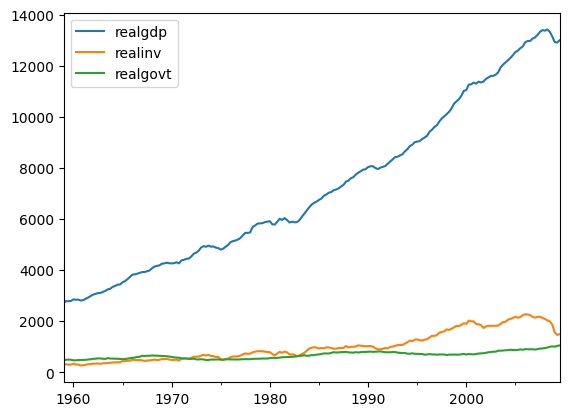

In [ ]:
import matplotlib.pyplot as plt

# Visualize the results
df.plot()
plt.legend(loc='best')

plt.show()

In [ ]:


# Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Check stationarity and apply differencing if necessary
train_diff = train.diff().dropna()

# Define the order of the VARMAX model
order = (1, 0)

# Fit the VARMAX model
model = VARMAX(train_diff, order=order)
model_fit = model.fit(maxiter=1000)  # Increase maxiter

# Get the predicted values
predictions_diff = model_fit.forecast(steps=len(test))
predictions = predictions_diff.cumsum() + train.iloc[-1].values

# Evaluate the model
mse = mean_squared_error(test['realgdp'], predictions['realgdp'])
rmse = sqrt(mse)
print("RMSE: %.3f" % rmse)


RMSE: 565.476


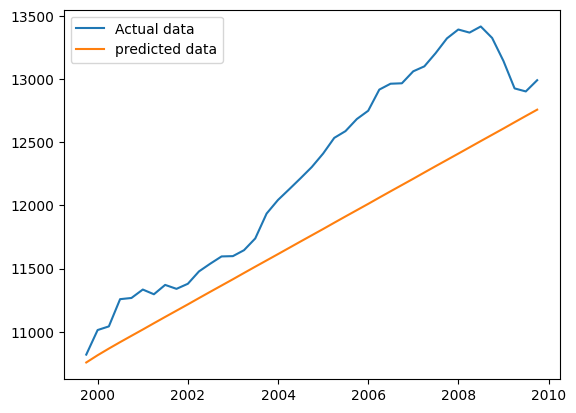

In [ ]:
plt.plot(test['realgdp'], label='Actual data')
plt.plot(predictions['realgdp'], label='predicted data')
plt.legend(loc='best')
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the macrodata dataset
from statsmodels.datasets import macrodata
data = macrodata.load_pandas().data

# Preprocess the dataset
df = data[['realgdp', 'realinv', 'realgovt']]
df.index = pd.date_range(start='1959-01-01', periods=len(df), freq='Q')

# Split the dataset into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Check stationarity and apply differencing if necessary
train_diff = train.diff().dropna()

# Manual model order selection
orders = [(1, 0), (2, 0), (1, 1), (2, 1)]  # Example orders to evaluate
best_order = None
best_rmse = float('inf')

for order in orders:
    # Fit the VARMAX model
    model = VARMAX(train_diff, order=order)
    model_fit = model.fit(maxiter=1000)  # Increase maxiter if needed

    # Get the predicted values
    predictions_diff = model_fit.forecast(steps=len(test))
    predictions = predictions_diff.cumsum() + train.iloc[-1].values

    # Evaluate the model
    mse = mean_squared_error(test['realgdp'], predictions['realgdp'])
    rmse = sqrt(mse)

    # Compare RMSE to find the best order
    if rmse < best_rmse:
        best_rmse = rmse
        best_order = order

# Fit the VARMAX model with the best_order
model = VARMAX(train_diff, order=best_order)
model_fit = model.fit(maxiter=1000)  # Increase maxiter if needed

# Get the predicted values
predictions_diff = model_fit.forecast(steps=len(test))
predictions = predictions_diff.cumsum() + train.iloc[-1].values

# Evaluate the model
mse = mean_squared_error(test['realgdp'], predictions['realgdp'])
rmse = sqrt(mse)
print("Best Order: ", best_order)
print("RMSE: %.3f" % rmse)


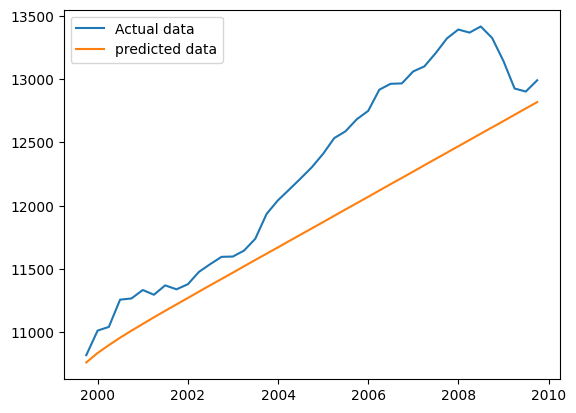

In [ ]:
plt.plot(test['realgdp'], label='Actual data')
plt.plot(predictions['realgdp'], label='predicted data')
plt.legend(loc='best')
plt.show()

## 10.9 Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX)
The Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) is an extension of the VARMA model that also includes the modeling of exogenous variables. It is a multivariate version of the ARMAX method.

Exogenous variables are also called covariates and can be thought of as parallel input sequences that have observations at the same time steps as the original series. The primary series(es) are referred to as endogenous data to contrast it from the exogenous sequence(s). The observations for exogenous variables are included in the model directly at each time step and are not modeled in the same way as the primary endogenous sequence (e.g. as an AR, MA, etc. process).

The VARMAX method can also be used to model the subsumed models with exogenous variables, such as VARX and VMAX.

The method is suitable for multivariate time series without trend and seasonal components with exogenous variables.

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=[0])
df.head(5)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
# Preprocess the dataset
df = df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']]
df = df.fillna(df.bfill())  # Fill missing values with backward fill
df.head(5)

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
No,,,,,,,
1,129.0,-21,-11.0,1021.0,1.79,0,0
2,129.0,-21,-12.0,1020.0,4.92,0,0
3,129.0,-21,-11.0,1019.0,6.71,0,0
4,129.0,-21,-14.0,1019.0,9.84,0,0
5,129.0,-20,-12.0,1018.0,12.97,0,0


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=[0])
df.head(5)

# Preprocess the dataset
df = df[['pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']]
df = df.fillna(df.bfill())  # Fill missing values with backward fill
df.head(5)

# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Model order selection
order = (1, 0)  # (p, q)
best_order = None
best_rmse = float('inf')

for p in range(1, 5):
    for q in range(1, 5):
        model = VARMAX(train, order=(p, q))
        model_fit = model.fit(disp=False)

        # Get the predicted values
        predictions = model_fit.forecast(steps=len(test), exog=test[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']])

        # Calculate RMSE
        rmse = sqrt(mean_squared_error(test['pm2.5'], predictions['pm2.5']))

        # Check if the current model has better performance
        if rmse < best_rmse:
            best_rmse = rmse
            best_order = (p, q)
            print(best_order)

# Fit the VARMAX model with the best order
model = VARMAX(df, order=best_order, exog=df[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']])
model_fit = model.fit(disp=False)

# Get the predicted values
predictions = model_fit.forecast(steps=len(test), exog=test[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']])



In [ ]:
# Calculate RMSE
rmse = sqrt(mean_squared_error(test['pm2.5'], predictions['pm2.5']))
print("RMSE:", rmse)

# Plotting the actual and predicted values
plt.plot(test.index, test['pm2.5'], label='Actual')
plt.plot(test.index, predictions['pm2.5'], label='Predicted')
plt.xlabel('Time')
plt.ylabel('pm2.5')
plt.title('Actual vs Predicted')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## 10.10 Simple Exponential Smoothing (SES)
Simple Exponential Smoothing (SES) is a technique used in time series analysis to forecast future values based on the weighted average of past observations. It is a popular method for smoothing out noise and identifying underlying patterns or trends in a time series dataset.

In SES, each observation in the time series is given a weight, with more recent observations typically receiving higher weights. The weights decrease exponentially as we move further back in time, hence the name "exponential smoothing."

The formula for simple exponential smoothing is as follows:

$ \hat{y}_{t+1} = \alpha \cdot y_t + (1 - \alpha) \cdot \hat{y}_t $

where:
- $\hat{y}_{t+1}$ is the forecasted value for the next time period $t+1$.
- $\alpha$ is the smoothing factor (0 < $\alpha$ < 1), which determines the weight given to the most recent observation. A higher $\alpha$ places more emphasis on recent data, while a lower $\alpha$ places more equal weight on all observations.
- $y_t$ is the actual value of the time series at time t.
- $\hat{y}_t$ is the predicted value of the time series at time t based on the previous forecast.

To initiate the forecasting process, an initial value for $\hat{y}_0$ needs to be chosen. It can be based on different approaches, such as the average of the initial observations or the first observation in the series.

The SES method is computationally simple and easy to implement. However, it assumes a constant level of the time series and does not consider seasonal patterns or other complex patterns in the data. Therefore, it is most suitable for datasets with a relatively stable and trendless behavior.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Sample time series data
data = pd.Series([23, 27, 31, 35, 38, 41, 45, 48, 50, 52])

data.head(5)

0    23
1    27
2    31
3    35
4    38
dtype: int64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Sample time series data
data = pd.Series([23, 27, 31, 35, 38, 41, 45, 48, 50, 52])

# Apply Simple Exponential Smoothing
model = SimpleExpSmoothing(data)
model_fit = model.fit()

# Forecast the next value
forecast = model_fit.forecast(steps=1)

# Generate the index for the forecasted point
forecast_index = pd.RangeIndex(start=data.index[-1], stop=data.index[-1]+1)
print(forecast_index)

RangeIndex(start=9, stop=10, step=1)


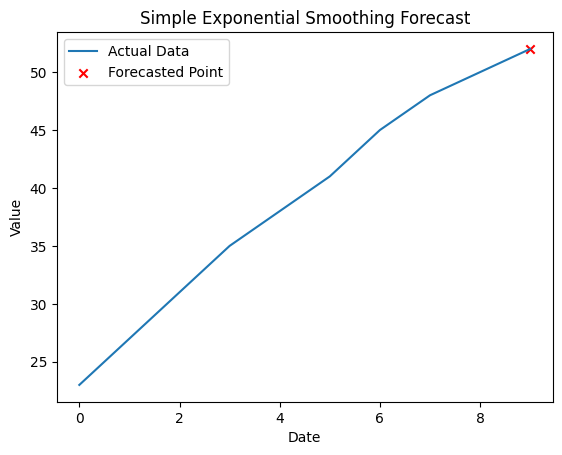

In [ ]:
# Plotting the actual data and forecasted point
plt.plot(data.index, data, label='Actual Data')
# plt.plot(data.index[-1], forecast, label='Actual Data')
plt.scatter(forecast_index, forecast, color='red', marker='x', label='Forecasted Point')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Simple Exponential Smoothing Forecast')
plt.legend()
plt.show()

## 10.11 Holt Winter’s Exponential Smoothing (HWES)


Holt-Winters' Exponential Smoothing (HWES) is a popular forecasting method used for time series data. It is an extension of simple exponential smoothing that takes into account the trends and seasonality in the data. HWES is effective in capturing both short-term fluctuations and long-term trends, making it suitable for forecasting data with complex patterns.

The HWES method utilizes three smoothing equations: one for the level, one for the trend, and one for the seasonality. These equations are updated iteratively to generate forecasts. Here's a brief overview of the steps involved:

1. Initialization: The initial values for the level, trend, and seasonality components are estimated. This can be done using various techniques, such as averaging the first few observations.

2. Level Smoothing: The level component represents the overall average value of the time series. In each time period, the observed value is combined with the smoothed value from the previous period to update the current level estimate. The level smoothing equation is typically defined as follows:

   $Level(t) = α * Observation(t) + (1 - α) * [Level(t-1) + Trend(t-1)]$

   Here, α is the smoothing parameter for the level component, and it determines the weight given to the most recent observation.

3. Trend Smoothing: The trend component represents the direction and rate of change in the time series. The trend smoothing equation is used to update the trend estimate based on the difference between the current level estimate and the previous level estimate. The trend smoothing equation is typically defined as:

   $Trend(t) = β * [Level(t) - Level(t-1)] + (1 - β) * Trend(t-1)$

   Here, β is the smoothing parameter for the trend component, and it controls the weight given to the recent trend.

4. Seasonality Smoothing: The seasonality component represents the periodic patterns in the data. This is applicable when the data exhibits a regular repeating pattern, such as weekly, monthly, or quarterly. The seasonality smoothing equation is used to update the seasonal estimate based on the difference between the current level estimate and the previous seasonally adjusted observation. The seasonal smoothing equation is typically defined as:

   $Seasonality(t) = γ * [Observation(t) - Level(t)] + (1 - γ) * Seasonality(t-m)$

   Here, γ is the smoothing parameter for the seasonality component, and it determines the weight given to the recent seasonality term. 'm' represents the length of the seasonal pattern (e.g., 12 for monthly data with a yearly pattern).

5. Forecasting: Once the level, trend, and seasonality estimates are updated, they can be used to generate forecasts for future time periods. The forecast equation is typically defined as:

   $Forecast(t+k) = Level(t) + k * Trend(t) + Seasonality(t+k-m+1)$

   Here, k represents the number of periods ahead for which you want to generate forecasts.

By iteratively updating the level, trend, and seasonality estimates and generating forecasts, HWES provides a way to predict future values of the time series. The choice of smoothing parameters (α, β, γ) and the length of the seasonal pattern (m) depends on the characteristics of the data and can be determined through optimization or manual tuning.

It's worth noting that HWES assumes that the time series exhibits a constant level, trend, and seasonality over time. Therefore, it may not be suitable for data with sudden changes or irregular patterns. In such cases, other forecasting methods like ARIMA or machine learning techniques may be more appropriate.

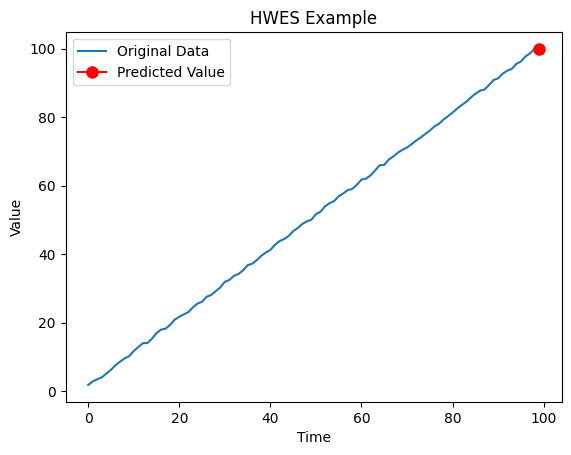

Predicted value: [99.95133705]


In [ ]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
import matplotlib.pyplot as plt

# contrived dataset
data = [x + random() for x in range(1, 100)]

# fit model
model = ExponentialSmoothing(data)
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(len(data), len(data))

# Plotting the original data and the predicted value
plt.plot(data, label='Original Data')
plt.plot([len(data)], [yhat], marker='o', markersize=8, color='red', label='Predicted Value')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('HWES Example')
plt.legend()
plt.show()

print("Predicted value:", yhat)
